In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

In [2]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.drop(columns=["Unnamed: 0", "key"], inplace=True)

In [4]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [5]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
df.shape

(200000, 7)

In [7]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
print(df.shape)
df.isnull().sum()

(199999, 7)


fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


## Filtering data

In [11]:
df = df[(df["passenger_count"] < 5) & (df["fare_amount"] >= 0)]
df = df[(df["pickup_latitude"] <= 90) &
        (df["pickup_latitude"] >= -90) &
        (df["dropoff_latitude"] <= 90) &
        (df["dropoff_latitude"] >= -90) &
        (df["pickup_longitude"] <= 180) &
        (df["pickup_longitude"] >= -180) &
        (df["dropoff_longitude"] <= 180) &
        (df["dropoff_longitude"] >= -180) 
       ]

In [12]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,181693.000000,181693.000000,181693.000000,181693.000000,181693.000000,181693.000000
mean,11.355001,-72.501040,39.920334,-72.513977,39.927051,1.326364
std,9.934997,10.435757,6.070314,10.387409,6.049122,0.683040
min,0.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000
25%,6.000000,-73.992052,40.734810,-73.991414,40.733834,1.000000
50%,8.500000,-73.981820,40.752553,-73.980090,40.753017,1.000000
75%,12.500000,-73.967158,40.767157,-73.963665,40.767993,1.000000
max,499.000000,40.806012,48.018760,40.831932,45.031598,4.000000


In [13]:
df.shape

(181693, 7)

In [14]:
from math import radians, sin, cos, asin, sqrt

In [15]:
def distance(ilat, ilong, flat, flong):
    ilat = radians(ilat)
    ilong = radians(ilong)
    flat = radians(flat)
    flong = radians(flong)
    
    latdiff = flat - ilat
    longdiff = flong - ilong
    
    dist = sin(latdiff/2)**2 + sin(longdiff/2)**2 * cos(ilat) * cos(flat)
    dist = 2 * asin(sqrt(dist))
    return 6371 * dist

In [16]:
df["distance"] = df.apply(lambda x : distance(x["pickup_latitude"], x["pickup_longitude"], x["dropoff_latitude"], x["dropoff_longitude"]), axis=1)

In [17]:
df.distance.describe()

count    181693.000000
mean         20.740722
std         382.667494
min           0.000000
25%           1.215269
50%           2.121017
75%           3.869687
max        8782.898606
Name: distance, dtype: float64

In [18]:
df = df[df["distance"] <= 100]
df.shape

(181272, 8)

In [19]:
df["distance"].describe()

count    181272.000000
mean          3.265674
std           3.728057
min           0.000000
25%           1.213300
50%           2.115999
75%           3.850312
max          99.162509
Name: distance, dtype: float64

In [20]:
df["datetime"] = pd.to_datetime(df["pickup_datetime"])
df.drop(columns=["pickup_datetime"], inplace=True)
# df.head()

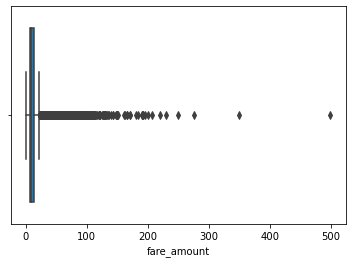

In [21]:
sns.boxplot(x = df["fare_amount"], data = df)
plt.show()

In [22]:
df["fare_amount"].describe()

count    181272.000000
mean         11.345702
std           9.917367
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

In [23]:
df["fare_amount"].quantile(0.75)

12.5

In [24]:
q1 = df["fare_amount"].quantile(0.25)
q3 = df["fare_amount"].quantile(0.75)

iqr = q3 - q1

upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

print(upper, lower)

22.25 -3.75


In [25]:
df=(df[(df["fare_amount"] >= lower) & (df["fare_amount"] <= upper)])
# df.shape

In [26]:
# len(sorted(np.array(df['fare_amount']),reverse=True))

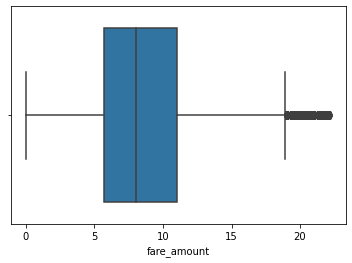

In [27]:
sns.boxplot(x = df["fare_amount"], data = df)
plt.show()

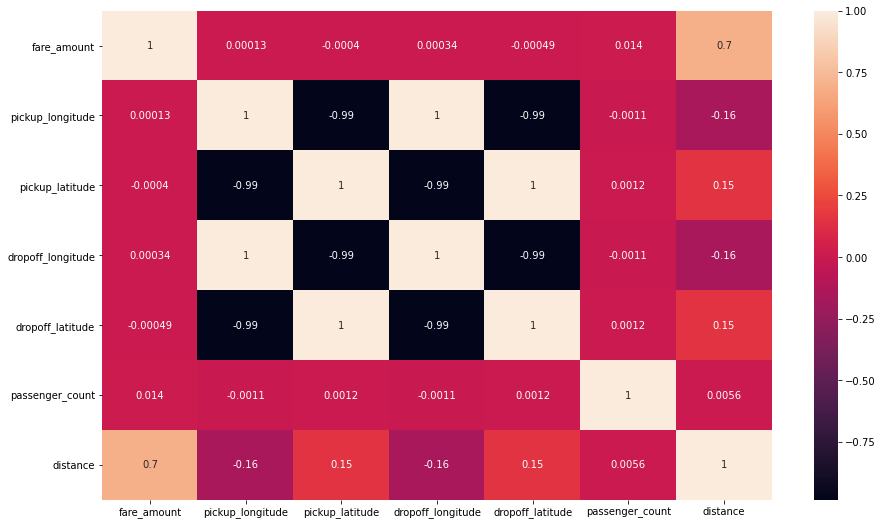

In [28]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [29]:
x = df.drop(columns=["fare_amount", "datetime"])
y = df["fare_amount"]

## Splitting data

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(x_test)

In [34]:
# print(accuracy_score(y_test, y_pred))
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

8.931764103618336
0.48223644751451966


## Random forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10, random_state=0)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [36]:
y_pred = model.predict(x_test)

In [37]:
print(mean_squared_error(y_test, y_pred))

5.475292545056307
